# EDA Survey Data
---
Glenn Abastillas | 22 April, 2020

In [73]:
from glob import glob
import pandas as pd
import altair as alt
import matplotlib.pyplot as plt
import re
import missingno

%matplotlib inline

### Load Data

In [7]:
survey_ = glob('../data/datasets/unicef/JMP*.csv')[0]
infrastructure_ = glob('../data/datasets/unicef/HCF*.csv')[0]
indicators_ = glob('../data/datasets/unicef/*indicators*.csv')[0]

In [8]:
survey = pd.read_csv(survey_)
infrastructure = pd.read_csv(infrastructure_)
indicators = pd.read_csv(indicators_)

---

### Examine Datatypes and Missing Data

##### Survey Data

This dataset is a dictionary/mapping of variables in the main data to user-readable labels.

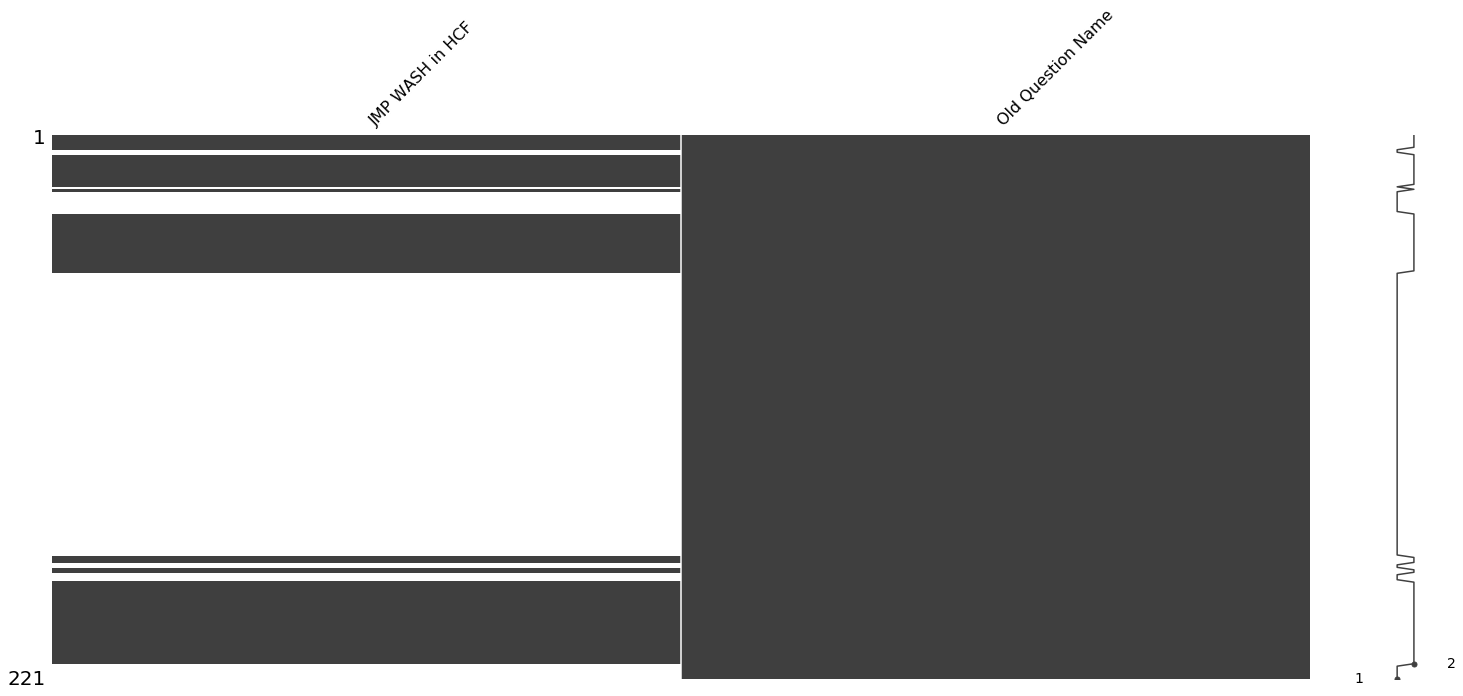

In [74]:
current = survey

missing = current.isna().sum()
missing, missing_shape, current_shape = missing[missing != 0], missing[missing != 0].shape, current.shape

columns = current.columns

sample = current.sample(10)

missingno.matrix(current)

In [ ]:
current['JMP WASH in HCF'].unique().tolist()

---

##### Infrastructure Data

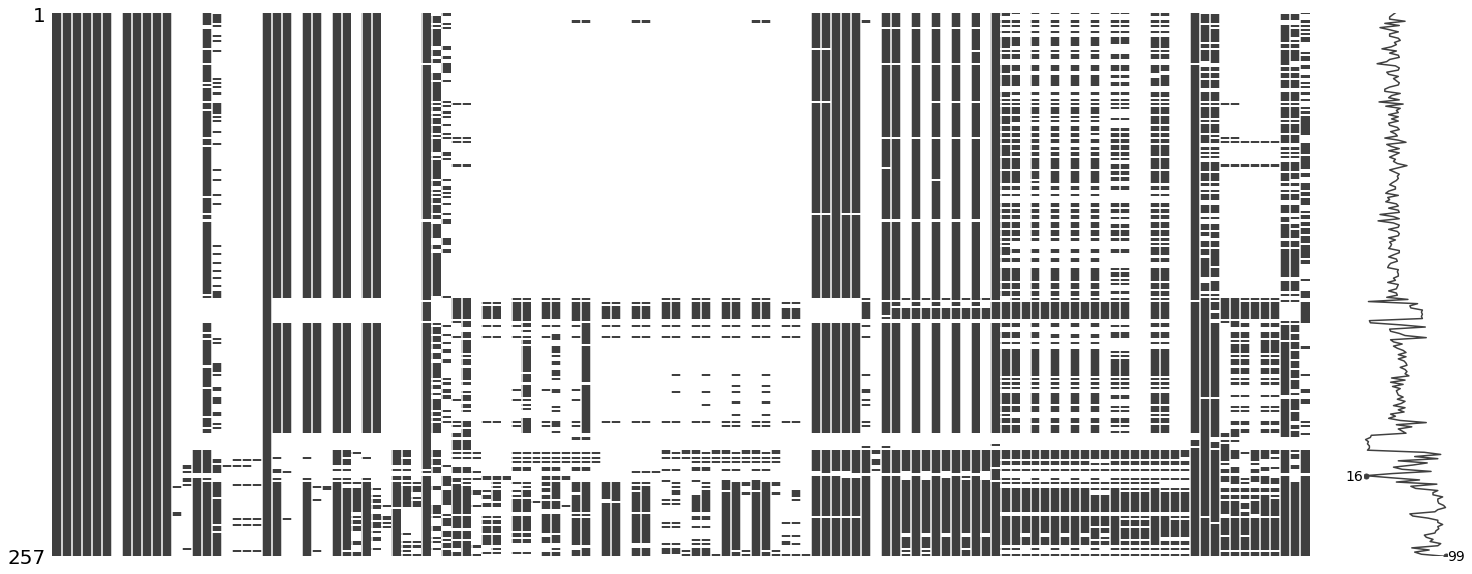

In [77]:
current = infrastructure

missing = current.isna().sum()
missing, missing_shape, current_shape = missing[missing != 0], missing[missing != 0].shape, current.shape

columns = current.columns

sample = current.sample(10)

missingno.matrix(current)

Some columns only have numeric data

In [78]:
current.filter(like='trans')

,trans - bike - total,trans - bike - func,trans - bike - project,trans - car - total,trans - car - func,trans - car - project,trans - moto - total,trans - moto - func,trans - moto - project,trans - tuktuk - total,trans - tuktuk - func,trans - tuktuk - project,trans - ambul - total,trans - ambul - func,trans - ambul - project
0,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,2.0,2.0,NaN,NaN,NaN,NaN
1,0.0,0.0,NaN,0.0,0.0,NaN,5.0,2.0,NaN,1.0,1.0,NaN,NaN,NaN,NaN
2,2.0,2.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,0.0,0.0,NaN,0.0,0.0,NaN,1.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,0.0,0.0,NaN,4.0,4.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
252,0.0,NaN,NaN,0.0,NaN,NaN,5.0,4.0,NaN,0.0,NaN,NaN,3.0,1.0,"Iran,diaspora"
253,0.0,NaN,NaN,0.0,NaN,NaN,1.0,1.0,NaN,0.0,0.0,NaN,0.0,NaN,NaN
254,0.0,NaN,NaN,3.0,1.0,NaN,0.0,NaN,NaN,0.0,NaN,NaN,3.0,1.0,NaN
255,0.0,NaN,NaN,0.0,NaN,NaN,2.0,1.0,Unicef,0.0,NaN,NaN,0.0,NaN,NaN


In [87]:
current['cds_type'].unique()

array(['Health Centre Type C', 'Health Centre Type A',
       'Maternal/Child Health Clinic', 'Regional Hospital',
       'Health Centre Type B', 'Private clinic',
       'Hospital Nacional Simao Mendes'], dtype=object)

In [80]:
current.dtypes[current.dtypes == 'object'].index.tolist()

['Deployment',
 'Enumerator',
 'Status',
 'Response Code',
 'Drafted On',
 'Submitted On',
 'IP Address',
 'cds_type',
 'cds_sanreg',
 'cds_sanarea',
 'cds_sanarea (other) - specify',
 'contact - 1 - name',
 'contact - 1 - title',
 'contact - 2 - name',
 'contact - 2 - title',
 'survey_date',
 'trans - car - project',
 'trans - moto - project',
 'trans - tuktuk - project',
 'trans - ambul - project',
 'generalstate',
 "const_year (Don't Know)",
 'rehab - elec - year',
 'rehab - elec - org',
 'rehab - elec - org_other',
 'rehab - bhole - year',
 'rehab - bhole - org',
 'rehab - bhole - org_other',
 'rehab - pump - year',
 'rehab - pump - org',
 'rehab - pump - org_other',
 'rehab - wtank - year',
 'rehab - wtank - org',
 'rehab - wtank - org_other',
 'rehab - wsystem - year',
 'rehab - wsystem - org',
 'rehab - wsystem - org_other',
 'rehab - incin - year',
 'rehab - incin - org',
 'rehab - toilet - year',
 'rehab - toilet - org',
 'rehab - toilet - org_other',
 'rehab - struct - year',

In [36]:
current.sample(10)

,Deployment,Enumerator,Status,Response Code,Drafted On,Submitted On,Approval Level,IP Address,cds_mwaterid,cds_type,...,energy_source_backup,solar - panel - installed,solar - panel - num,solar - panel - cap,solar - batt - installed,solar - batt - num,solar - batt - cap,energy_light_total,energy_light_func,infra_pics
33,Data Upload from old survey,kingsley.chris,Final,Fredrik Asplund-6T99YZ,2020-03-16 12:14:17,2018-08-03 14:27:42,NaN,154.73.62.98,4703967,Health Centre Type C,...,None,NaN,NaN,NaN,NaN,NaN,NaN,20.0,20.0,https://api.mwater.co/v3/images/be104f4d72b044...
233,Data Upload from old survey,kingsley.chris,Final,Isa.lopes7-83FPRG,2020-03-16 12:14:17,2019-12-04 13:29:07,NaN,154.73.62.98,436133,Health Centre Type B,...,None,2005-01-01,12.0,260.0,2019-01-01,4.0,250.0,17.0,15.0,https://api.mwater.co/v3/images/5c9d0d9e946b41...
99,Data Upload from old survey,kingsley.chris,Final,Fredrik Asplund-6T99YZ,2020-03-16 12:14:17,2018-08-03 14:27:42,NaN,154.73.62.98,4703833,Health Centre Type C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://api.mwater.co/v3/images/dbba8269fb534e...
2,Data Upload from old survey,kingsley.chris,Final,Fredrik Asplund-6T99YZ,2020-03-16 12:14:17,2018-08-03 14:27:42,NaN,154.73.62.98,4703297,Health Centre Type C,...,Solar,NaN,NaN,NaN,NaN,NaN,NaN,19.0,10.0,NaN
192,Data Upload from old survey,kingsley.chris,Final,Fredrik Asplund-6TLUPH,2020-03-16 12:14:17,2018-08-07 14:40:42,NaN,154.73.62.98,4703754,Health Centre Type C,...,None,NaN,NaN,NaN,NaN,NaN,NaN,10.0,10.0,NaN
228,Data Upload from old survey,kingsley.chris,Final,Isa.lopes7-83CTHU,2020-03-16 12:14:17,2019-12-03 10:58:20,NaN,154.73.62.98,4703369,Health Centre Type B,...,None,2017-01-01,6.0,260.0,2017-01-01,4.0,250.0,10.0,3.0,https://api.mwater.co/v3/images/bd04b99fd1c847...
139,Data Upload from old survey,kingsley.chris,Final,Fredrik Asplund-6TLBUZ,2020-03-16 12:14:17,2018-08-07 10:15:04,NaN,154.73.62.98,435943,Health Centre Type C,...,Solar,2018-01-01,4.0,250.0,2018-01-01,4.0,220.0,NaN,NaN,https://api.mwater.co/v3/images/4340aaaa86e543...
141,Data Upload from old survey,kingsley.chris,Final,Fredrik Asplund-6TLE2M,2020-03-16 12:14:17,2018-08-07 10:49:47,NaN,154.73.62.98,435967,Health Centre Type C,...,NaN,2018-01-01,4.0,220.0,2018-01-01,4.0,250.0,NaN,NaN,https://api.mwater.co/v3/images/e6425f7a65264f...
76,Data Upload from old survey,kingsley.chris,Final,Fredrik Asplund-6T99YZ,2020-03-16 12:14:17,2018-08-03 14:27:42,NaN,154.73.62.98,4703857,Health Centre Type C,...,None,NaN,NaN,NaN,NaN,NaN,NaN,5.0,5.0,https://api.mwater.co/v3/images/cd4baccf17f342...
77,Data Upload from old survey,kingsley.chris,Final,Fredrik Asplund-6T99YZ,2020-03-16 12:14:17,2018-08-03 14:27:42,NaN,154.73.62.98,4704126,Health Centre Type C,...,None,NaN,NaN,NaN,NaN,NaN,NaN,19.0,2.0,https://api.mwater.co/v3/images/e7c70309b71b4a...


---
##### Indicators Data

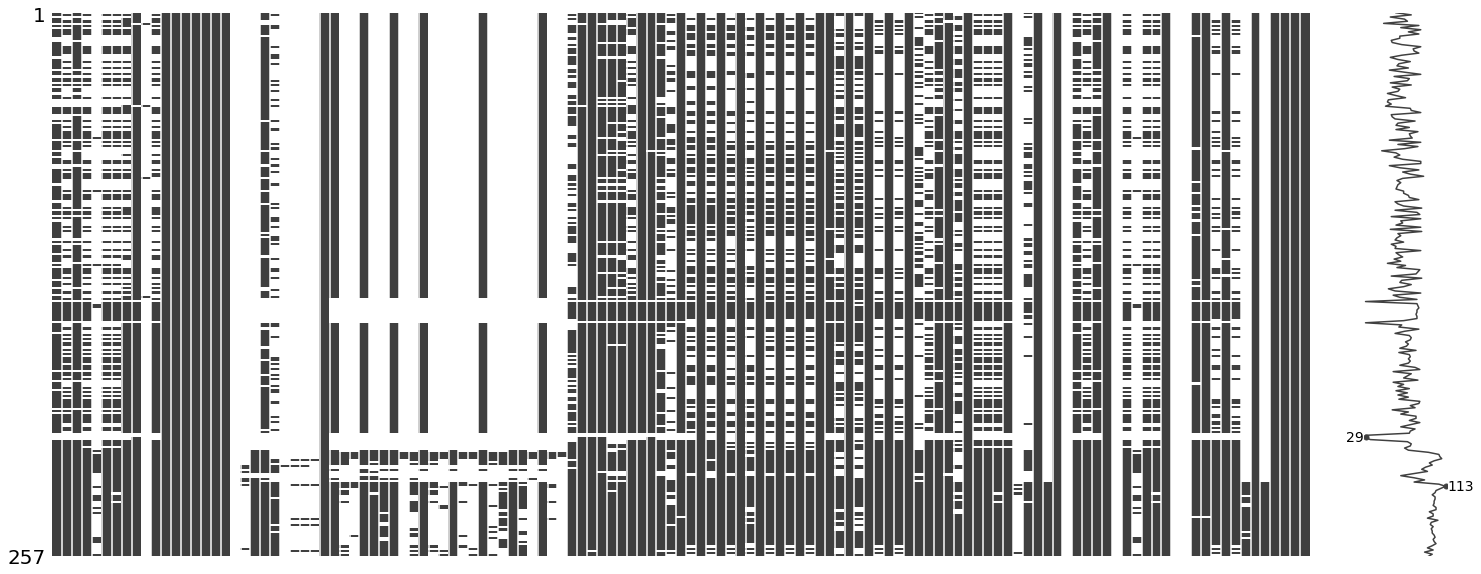

In [76]:
current = indicators

missing = current.isna().sum()
missing, missing_shape, current_shape = missing[missing != 0], missing[missing != 0].shape, current.shape

columns = current.columns

sample = current.sample(10)

missingno.matrix(current)

In [68]:
current.columns.tolist()

['jmp_hyg_svclvl',
 'jmp_hyg_avail',
 'jmp_hyg_soap',
 'jmp_waste_svclvl',
 'jmp_waste_3bins',
 'jmp_waste_sharps',
 'jmp_waste_inf',
 'jmp_wat_svclvl',
 'jmp_wat_imp',
 'jmp_wat_none',
 'jmp_wat_dist',
 'enum',
 'status',
 'rcode',
 'hcf_mwaterid',
 'hcf_type',
 'reg_san',
 'area_san',
 'area_san_other',
 'cont1_name',
 'cont1_title',
 'cont1_orng',
 'cont1_mtn',
 'cont2_name',
 'cont2_title',
 'cont2_orng',
 'cont2_mtn',
 'survey_date',
 'staff_docs_all',
 'Staffing of the health facility: Doctors - Number of male staff',
 'Staffing of the health facility: Doctors - Number of female staff',
 'Staffing of the health facility: Nurses - Total number of staff',
 'Staffing of the health facility: Nurses - Number of male staff',
 'Staffing of the health facility: Nurses - Number of female staff',
 'Staffing of the health facility: Midwives - Total number of staff',
 'Staffing of the health facility: Midwives - Number of male staff',
 'Staffing of the health facility: Midwives - Number of f

In [72]:
current.sample(3)

,jmp_hyg_svclvl,jmp_hyg_avail,jmp_hyg_soap,jmp_waste_svclvl,jmp_waste_3bins,jmp_waste_sharps,jmp_waste_inf,jmp_wat_svclvl,jmp_wat_imp,jmp_wat_none,...,jmp_san_mhm,jmp_san_staff,jmp_san_hcap,jmp_cln_svclvl,jmp_cln_prot,jmp_cln_staff,hcf_name,submitted_date,lat,lon
19,Basic,Yes,Yes,Limited,NaN,Safe,Safe,Limited,Improved,NaN,...,No,No,No,NaN,No,NaN,Caio,2018-08-03 14:27:42,11.93028,-16.20036
216,No service,No,No,No service,No,Safe,Safe,Limited,Improved,NaN,...,No,No,No,NaN,No,NaN,Jeta,2018-11-07 11:06:14,11.85698,-16.25470
146,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,No,NaN,Catio,2018-08-07 12:51:13,11.28435,-15.25556


In [7]:
data.sample(10)

NameError: name 'data' is not defined